In [67]:
from subprocess import check_output
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard
num_classes = 10
epochs = 20

In [68]:
(trainX, trainY), (validateX, validateY) = fashion_mnist.load_data()

PONIZEJ KOD DO SLADJDU DATA EXPLORATION



In [36]:
trainX[0].shape

(28, 28)

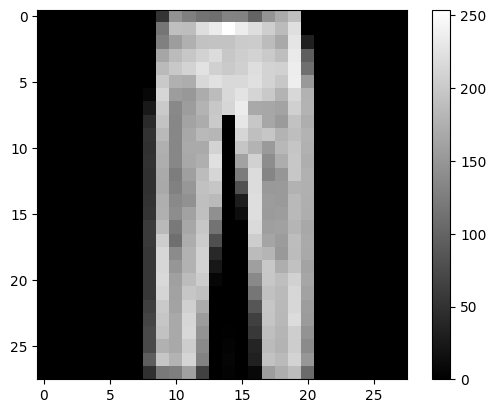

In [66]:
plt.figure()
plt.imshow(trainX[16], cmap='gray')
plt.colorbar()
plt.grid(False)
plt.show()

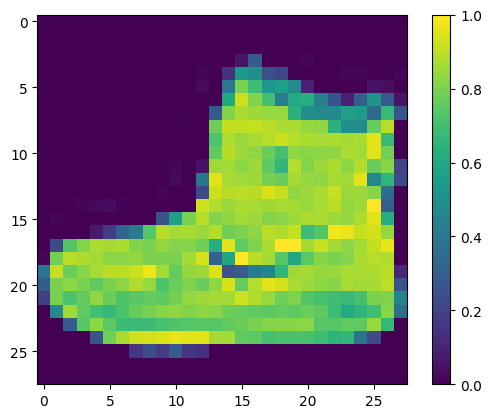

In [5]:
plt.figure()
plt.imshow(trainX[0] / 255.0)
plt.colorbar()
plt.grid(False)
plt.show()

In [32]:
print(np.isnan(trainX).any().sum())
print(np.isnan(trainY).any().sum())
print(np.isnan(validateX).any().sum())
print(np.isnan(validateY).any().sum())

0
0
0
0


PONIZEJ KOD DO SLADJDU DATA VISUALISATION


In [22]:
index_to_item = {0:"T-shirt/top", 1:"Trouser", 2:"Pullover", 3:"Dress", 4:"Coat", 5:"Sandals", 6:"Shirt", 7:"Sneaker", 8:"Bag", 9:"Ankle Boots"}
unique, counts = np.unique(trainY, return_counts=True)
unique_items = [index_to_item[x] for x in unique]
D = dict(zip(unique_items, counts))


{'T-shirt/top': 6000, 'Trouser': 6000, 'Pullover': 6000, 'Dress': 6000, 'Coat': 6000, 'Sandals': 6000, 'Shirt': 6000, 'Sneaker': 6000, 'Bag': 6000, 'Ankle Boots': 6000}


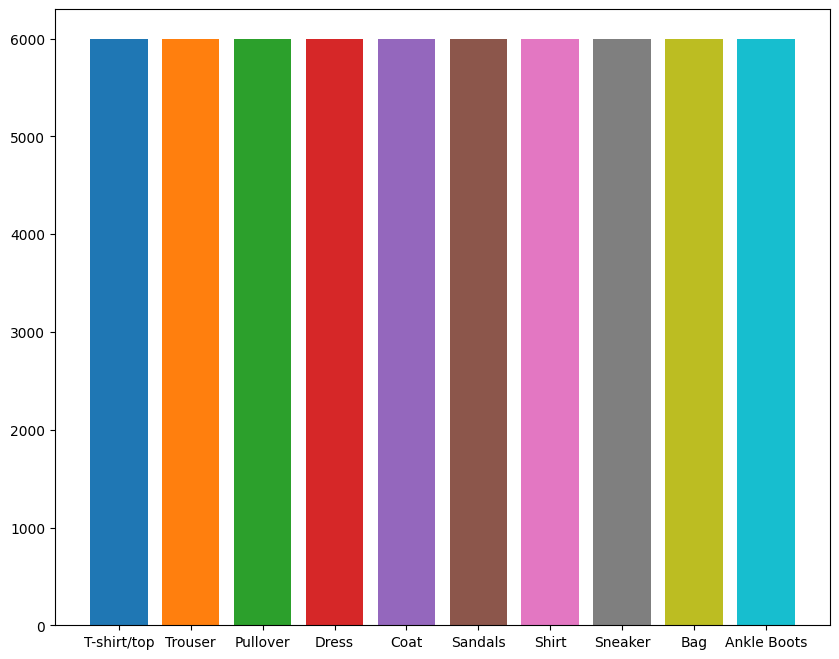

In [28]:
import matplotlib.colors as mcolors

fig = plt.figure(figsize=(10,8))
plt.bar(range(len(D)), list(D.values()), align='center', color = mcolors.TABLEAU_COLORS)
plt.xticks(range(len(D)), list(D.keys()))

plt.show()

PONIZEJ JUZ NORMALNY KOD

In [3]:
trainX.shape

(60000, 28, 28)

In [69]:
image_rows = 28
image_cols = 28
batch_size = 4096
image_shape = (image_rows,image_cols)

**[CNN model - default Adam + dropout]**

In [39]:
CNN_model_Adam = Sequential([
    Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=(*image_shape, 1)),
    MaxPooling2D(pool_size=2),
    Dropout(0.2),
    Flatten(),
    Dense(32,activation='relu'),
    Dense(10,activation = 'softmax')
])

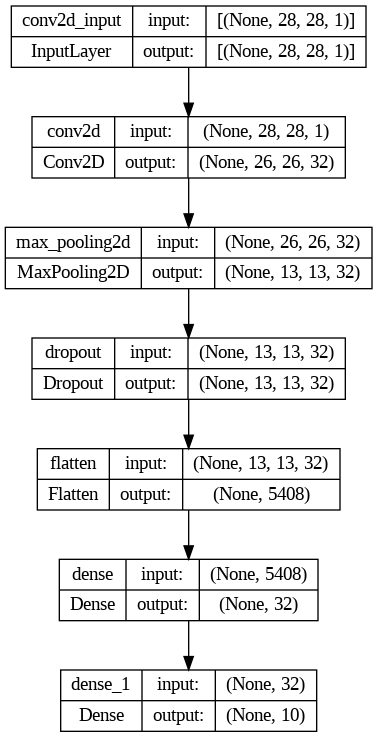

In [42]:
from keras.utils.vis_utils import plot_model

plot_model(CNN_model_Adam, show_shapes=True)

In [70]:
CNN_model_Adam.compile(loss ='sparse_categorical_crossentropy', optimizer="Adam", metrics =['accuracy'])

In [71]:
history_CNN_Adam = CNN_model_Adam.fit(trainX, trainY, batch_size = 4096, epochs = 75, verbose = 1, validation_data=(validateX, validateY))

Epoch 1/75
15/15 [==============================] - 40s 2s/step - loss: 16.9341 - accuracy: 0.3271 - val_loss: 1.9778 - val_accuracy: 0.2866
Epoch 2/75
15/15 [==============================] - 37s 2s/step - loss: 2.0604 - accuracy: 0.2336 - val_loss: 1.9494 - val_accuracy: 0.2743
Epoch 3/75
15/15 [==============================] - 36s 2s/step - loss: 1.9178 - accuracy: 0.3295 - val_loss: 1.8199 - val_accuracy: 0.3563
Epoch 4/75
15/15 [==============================] - 35s 2s/step - loss: 1.8520 - accuracy: 0.3546 - val_loss: 1.7922 - val_accuracy: 0.3682
Epoch 5/75
15/15 [==============================] - 33s 2s/step - loss: 1.8213 - accuracy: 0.3642 - val_loss: 1.7711 - val_accuracy: 0.3624
Epoch 6/75
15/15 [==============================] - 33s 2s/step - loss: 1.7869 - accuracy: 0.3621 - val_loss: 1.7555 - val_accuracy: 0.3659
Epoch 7/75
15/15 [==============================] - 33s 2s/step - loss: 1.7681 - accuracy: 0.3661 - val_loss: 1.7367 - val_accuracy: 0.3733
Epoch 8/75
15/15 [=

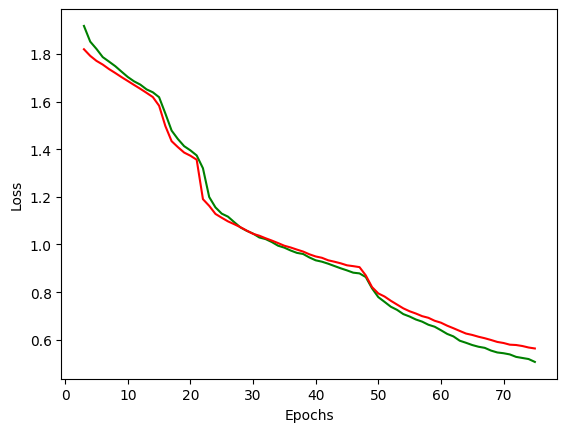

In [78]:
loss = history_CNN_Adam.history["loss"][2:]
val_loss = history_CNN_Adam.history["val_loss"][2:]
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.plot(range(3,76), loss, "g", label = "Training Loss")
plt.plot(range(3,76), val_loss, "r", label = "Validation Loss")

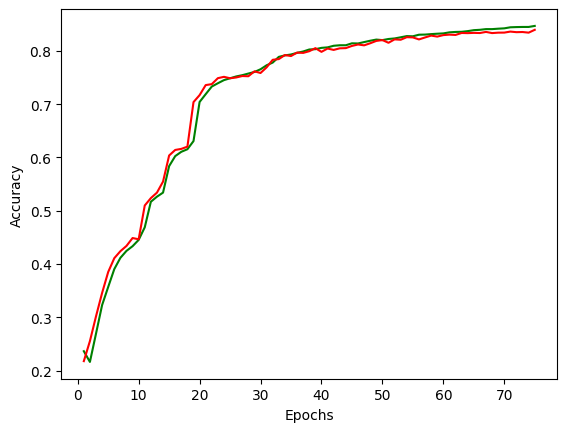

In [9]:
accuracy = history_CNN_Adam.history["accuracy"]
val_accuracy = history_CNN_Adam.history["val_accuracy"]
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.plot(range(1,76), accuracy, "g", label = "Validation Accuracy")
plt.plot(range(1,76), val_accuracy, "r", label = "Validation Accuracy")